# Evaluating the Flat Universe Model with Type 1a Supernovae
Caitlin Begbie and Emma Yu\
ASTRON C161 Spring 2024\
Professor Kasen

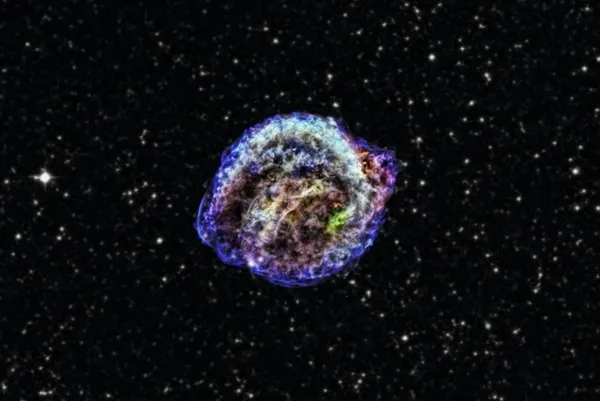

#### Importing Packages

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

## Why Type 1a Supernova?

We decided to use the redshift and apparent magnitude data of Type 1a Supernova because....

## Deriving the m-z relation in the flat universe model

The general equation for the apparent magnitude is:
            
$\Huge m-M = 5log_{10}[\frac{d_L}{1 Mpc}]+25$ 

Where $d_L$ is the *luminosity distance*. In a metric using the comoving coordinate $r_1$, the luminosity distance is:

$\Huge d_L = a_0r(1+z)$

To solve for the comoving coordinate r in terms of z we begin with the Friedmann-Robertson-Walker Metric:

$\Huge ds^2 = -c^2dt^2 + a^2(t)[\frac{dr^2}{1-kr^2} + \Omega(\theta, \phi)] $

Where $k=0$ for a flat universe and we'll set $ds^2=\Omega(\theta, \phi)=0$ since we will consider the radial path of light. The equation then becomes:

$\Huge cdt = \pm a(t)dr$

We then integrate r from $t'=0$ to $t'=t$:

$\Huge \int_{0}^{t} \frac{cdt'}{a(t')} = \int_{0}^{r}dr' = r$

To get r in terms of z, we need to find the relation between $dt$ and $dz$. To do this we use the following equations:

$\Huge H(z) = \frac{da}{dt}\frac{1}{a}= \frac{da}{dz}\frac{dz}{dt}\frac{1+z}{a_0}$

Since $\Huge a=\frac{a_0}{1+z}$, $\Huge da=-\frac{a_0dz}{(1+z)^2}$

Substituting these into each other" we end up with:

$\Huge dt = -\frac{dz}{H(z)(1+z)}$

Finally, using this to substitute dt for dz:

$\Huge r = \int_{z}^{0} \frac{c(1+z')}{a_0}\frac{-dz'}{H(z')(1+z')} = {\frac{c}{a_0H_{0}}}\int_{0}^{z} \frac{H_0}{H(z')} dz'$

Plugging this back into our expression for $d_L$:

$\Huge d_L = a_0r(1+z) = {\frac{c}{H_{0}}}(1+z)\int_{0}^{z} \frac{H_0}{H(z')} dz'$

Therefore, in a flat universe, we would expect the luminosity distance and redshift of an object to follow the following relation:

$\Huge d_L = {\frac{c}{H_{0}}}(1+z)\int_{0}^{z} 1/E(z') \,dz' $

Where we define a new funcion $E(z)$ to be $H(z)/H_0$. 

Our final expression for the relation between m (apparent magnitude) and z (redshift) is:

$\Huge m-M = 5log_{10}[\frac{{\frac{c}{H_{0}}}(1+z)\int_{0}^{z}\frac{1}{E(z')} \,dz'}{1 Mpc}]+25$ 

Since Type 1a Supernovae all have an absolute magnitude of about $M \thickapprox -19.5$, our equation becomes:

$\Huge m = 5log_{10}[\frac{{\frac{c}{H_{0}}}(1+z)\int_{0}^{z}\frac{1}{E(z')} \,dz'}{1 Mpc}]+44.5$ 


## Interpolating E(z)

According to the paper by [A Reiss, et al.](https://iopscience.iop.org/article/10.3847/1538-4357/aaa5a9/pdf), one way to determine the $E(z)$ function is to pick a set of experimentally determined values of E(z) at different redshifts and interpolate a function to fit the points. For this analysis, we will use data collected from the [Pantheon and MCT Sn Ia programs](https://arxiv.org/abs/1710.00845). Following the steps taken in [A Reiss, et al.](https://iopscience.iop.org/article/10.3847/1538-4357/aaa5a9/pdf), we will fit a piecewise-cubic Hermite interpolating polynomial (PCHIP) to the following values of E(z): 

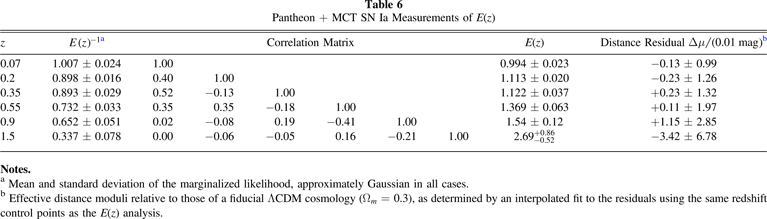

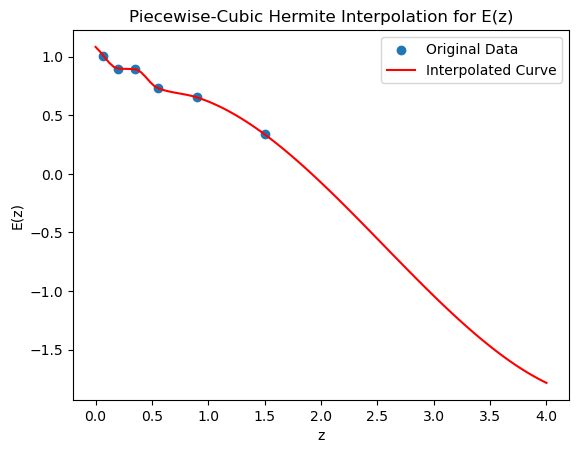

In [6]:
# E(z) data points extracted from the table
z = np.array([0.07, 0.2, 0.35, 0.55, 0.9, 1.5])
E = np.array([1.007, 0.898, 0.893, 0.732, 0.652, 0.337])

# Create a PchipInterpolator object
interpolator = PchipInterpolator(z, E)

# Define the range of z values for interpolation
z_values = np.linspace(0, 4, 100)

# Interpolate the y values for the given x values
E_values = interpolator(z_values)

# Plot the original data points and the interpolated curve
plt.scatter(z, E, label='Original Data')
plt.plot(z_values, E_values, label='Interpolated Curve', color='red')
plt.xlabel('z')
plt.ylabel('E(z)')
plt.title('Piecewise-Cubic Hermite Interpolation for E(z)')
plt.legend()
plt.show()

Since we mainly care about the integral of $1/E(z)$ instead of $E(z)$ itself, we can use the interpolation function to compute the antiderivative of E(z) between a specified range of z values:

In [11]:
# Define the range of x values for integration
x_values = np.linspace(0, 4, 100)

# Interpolate the y values for the given x values
y_values = interpolator(x_values)

# Calculate the antiderivative (integral) using the trapezoidal rule
integral_values = np.trapz(y_values, x_values)
antiderivative = np.trapz(y_values, x_values)

# From this, we can define a function that would return our predicted m for a given z value

def e_function(z):
    # Hubble constant in km/s/mpc
    H0 = 69.8
    # c in km/s
    c = 299792
    
    # Define the range of x values for integration
    x_values = np.linspace(0, z, 100)
    # Interpolate the y values for the given x values
    y_values = interpolator(x_values)
    # Calculate the antiderivative (integral) using the trapezoidal rule
    integral_value = np.trapz(1/y_values, x_values)

    return 5*np.log10(c/H0*(1+z)*integral_value)+6

Text(0, 0.5, 'predicted apparent magnitude (m)')

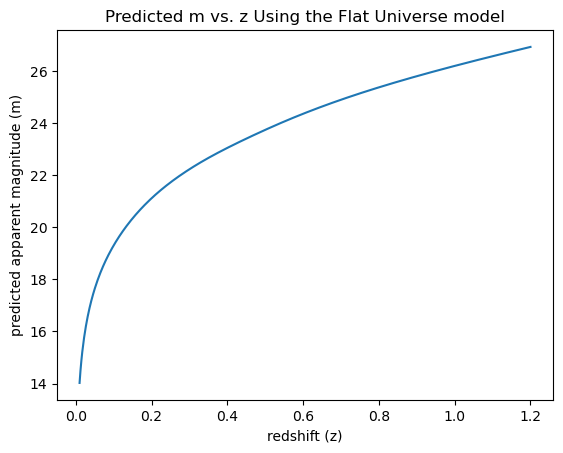

In [16]:
# Define a range of z values to plot
test_z = np.linspace(0.01, 1.2, 500)
# Use our new function to generate our predictions for m based on the equation derived earlier
pred_m = []
for z in test_z:
    pred_m.append(e_function(z))

# Plot the new function
plt.plot(test_z, pred_m)
plt.title('Predicted m vs. z Using the Flat Universe model')
plt.xlabel('redshift (z)')
plt.ylabel('predicted apparent magnitude (m)')

### Unpacking Our Supernova Data

We sourced our Type 1a Supernova data from a Wolfram Alpha educational notebook which got its data from the following paper: [Type Ia Supernova Distances at Redshift >1.5 from the Hubble Space Telescope Multicycle Treasury Programs: The Early Expansion Rate](https://iopscience.iop.org/article/10.3847/1538-4357/aaa5a9/pdf)

The data we're interested in is the redshift and apparent magnitudes of the supernovae which came from the CANDELS and CLASH programs run on the Hubble Space Telescope.

Text(0.5, 0, 'redshift (z)')

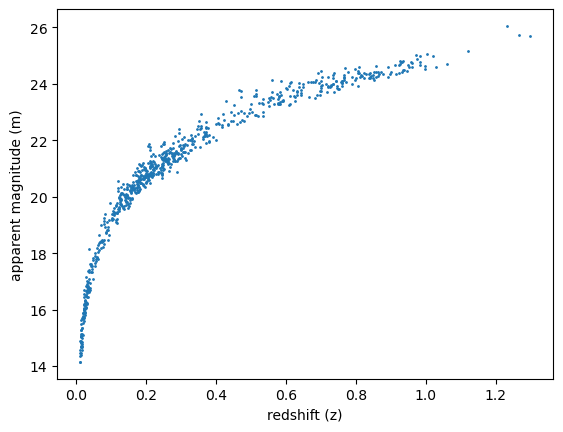

In [5]:
file_path = 'sn_plottingdata_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

plt.plot(df['redshift'], df['magnitude'], '.', ms=2)
plt.ylabel('apparent magnitude (m)')
plt.xlabel('redshift (z)')

### Unpacking Our Galaxy Data

In [97]:
#reading the .csv file using pandas
sn_file = pd.read_csv('updated_output_csv_file.csv', on_bad_lines = 'skip')

We needed to get rid of the rows in the file that had empty cells or NAN values for the redshift and gal_mag columns. We did this as follows:

In [111]:
# Replace strings consisting only of spaces with NaN values in the specified columns
sn_file['redshift'] = sn_file['redshift'].replace(r'^\s*$', pd.NA, regex=True)
sn_file['gal_mag'] = sn_file['gal_mag'].replace(r'^\s*$', pd.NA, regex=True)

# Drop rows with NaN values in both specified columns
sn_file = sn_file.dropna(subset=['redshift', 'gal_mag'])

# Reset index after dropping rows
sn_file = sn_file.reset_index(drop=True)

#Turn the columns from strings into floats 
sn_file['gal_mag'] = sn_file['gal_mag'].astype(float)
sn_file['redshift'] = sn_file['redshift'].astype(float)

In [102]:
len(sn_file['redshift'])

5350

#### Defining Variables

In [112]:
#magnitude of galaxies
g_mag = sn_file['gal_mag']

#redshift of galaxies
redshift = sn_file['redshift']

#### Plotting Magnitude and Redshift of Galaxies

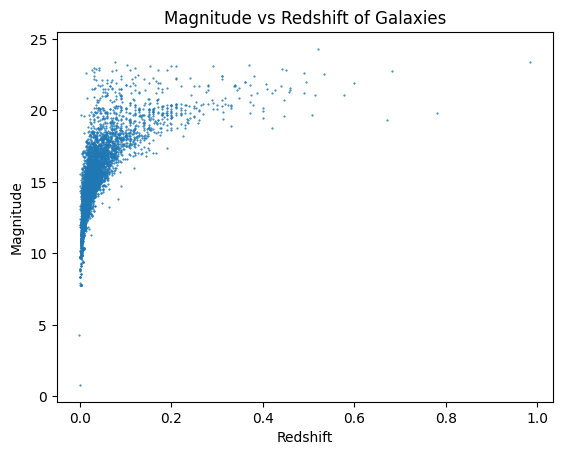

In [110]:
plt.plot(redshift, g_mag, ".", ms = 1)
plt.title("Magnitude vs Redshift of Galaxies")
plt.xlabel("Redshift")
plt.ylabel("Magnitude")
plt.show()

## Conclusion